# Описание компании "Диасофт"

«Диасофт» — ведущий российский разработчик и поставщик IT-решений для финансового сектора и других отраслей экономики. Основанная более 30 лет назад, компания накопила значительный опыт в разработке, внедрении и сопровождении IT-систем. В портфеле «Диасофт» более 230 продуктов, включая корпоративное программное обеспечение для финансовых институтов, решения для управления ресурсами предприятия и системное программное обеспечение. Ежегодно компания реализует свыше 250 уникальных IT-проектов, а ее клиентами являются более 150 организаций, включая более половины банков из топ-100. 13 февраля 2024 года акции «Диасофт» начали торговаться на Московской бирже под тикером DIAS.  

 - Компания имеет филиалы в различных городах России, включая Москву, Санкт-Петербург, Ярославль, Чебоксары, Пермь, Воронеж, Новосибирск и Самару.  
 - Среди основных продуктов «Диасофт» выделяется «Финансовая Архитектура Diasoft FA#», а также семейство приложений под маркой Flextera, предназначенных для автоматизации банковской деятельности.  
 - В 2023 финансовом году, завершившемся 31 марта 2024 года, выручка компании составила 9,14 млрд рублей, что на 27,1% больше по сравнению с предыдущим годом. Рост выручки был обусловлен диверсификацией бизнеса, запуском новых продуктов и укреплением позиций на рынке.  
 - «Диасофт» признан мировыми экспертами, такими как Gartner, IDC, Forrester и Celent, и продолжает активно развиваться, предлагая современные IT-решения для финансового сектора и других отраслей экономики.


# Структура данных

| Поле           | Тип данных  | Описание |
|---------------|------------|----------|
| **tradeno**   | `int64`    | Уникальный номер сделки. |
| **tradetime** | `time`     | Время совершения сделки в формате `HH:MM:SS`. |
| **boardid**   | `string`   | Идентификатор торговой площадки (например, `TQBR` для основного рынка акций). |
| **secid**     | `string`   | Тикер торгуемого инструмента (`DIAS`). |
| **price**     | `double`   | Цена за единицу инструмента в рублях. |
| **quantity**  | `int32`    | Количество акций, участвующих в сделке. |
| **value**     | `double`   | Общая стоимость сделки (`цена * количество`). |
| **period**    | `string`   | Период сделки (обычно `S` для спот-рынка). |
| **tradetime_grp** | `int32` | Сгруппированное значение времени (видимо, для удобства анализа). |
| **systime**   | `datetime` | Системное время записи сделки в формате `YYYY-MM-DD HH:MM:SS`. |
| **buysell**   | `string`   | Направление сделки (`B` – покупка, `S` – продажа). |
| **decimals**  | `int32`    | Количество знаков после запятой в цене. |
| **tradingsession** | `string` | Торговая сессия (обычно `1` для основной сессии). |


## Часть 1: Загрузка и предобработка данных


In [4]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import datetime as dt
from matplotlib import pyplot as plt
from plotly import graph_objects as go
from scipy import stats as st
import math as mth
import json
import warnings
import plotly.express as px 
import phik
from phik.report import plot_correlation_matrix

warnings.filterwarnings("ignore")

# Укажите путь к файлу
file_path = r"C:\Users\Matvey\Desktop\Диплом\Код\trades.json"

# Открываем и загружаем JSON
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# Преобразование данных в DataFrame
df = pd.DataFrame(data["trades"]["data"], columns=data["trades"]["columns"])

# Приведение названий столбцов к нижнему регистру
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Преобразование типов данных
df['tradetime'] = pd.to_datetime(df['tradetime'], format='%H:%M:%S').dt.time
df['systime'] = pd.to_datetime(df['systime'])
df['price'] = df['price'].astype(float)

# Фильтрация по времени (10:00 - 14:00)
df = df[(df['tradetime'] >= dt.time(10, 0, 0)) & (df['tradetime'] <= dt.time(14, 0, 0))].reset_index(drop=True)

print("Вывод первых строк датасета:")
display(df.head())
print("Вывод последних строк датасета:")
display(df.tail())
print("Общая информация о данных:")
display(df.info())
print("Описательная статистика для числовых переменных:")
display(df.describe())
print("Количество дубликатов:")
display(df.duplicated().sum())
print("Количество уникальных значений в каждом столбце:")
display(df.nunique())
print("Количество пропущенных значений:")
display(df.isna().sum())


Вывод первых строк датасета:


,tradeno,tradetime,boardid,secid,price,quantity,value,period,tradetime_grp,systime,buysell,decimals,tradingsession
0,12331632872,10:00:00,TQBR,DIAS,4114.0,4,16456.0,N,1000,2025-02-14 10:00:00,S,1,1
1,12331632873,10:00:00,TQBR,DIAS,4110.5,2,8221.0,N,1000,2025-02-14 10:00:00,S,1,1
2,12331632874,10:00:00,TQBR,DIAS,4110.0,5,20550.0,N,1000,2025-02-14 10:00:00,S,1,1
3,12331632875,10:00:00,TQBR,DIAS,4109.0,1,4109.0,N,1000,2025-02-14 10:00:00,S,1,1
4,12331632876,10:00:00,TQBR,DIAS,4109.0,50,205450.0,N,1000,2025-02-14 10:00:00,S,1,1


Вывод последних строк датасета:


,tradeno,tradetime,boardid,secid,price,quantity,value,period,tradetime_grp,systime,buysell,decimals,tradingsession
4672,12336419278,13:59:57,TQBR,DIAS,4050.0,1,4050.0,N,1359,2025-02-14 13:59:58,S,1,1
4673,12336419279,13:59:57,TQBR,DIAS,4050.0,1,4050.0,N,1359,2025-02-14 13:59:58,S,1,1
4674,12336419280,13:59:57,TQBR,DIAS,4050.0,1,4050.0,N,1359,2025-02-14 13:59:58,S,1,1
4675,12336419281,13:59:57,TQBR,DIAS,4050.0,4,16200.0,N,1359,2025-02-14 13:59:58,S,1,1
4676,12336419537,13:59:58,TQBR,DIAS,4050.5,8,32404.0,N,1359,2025-02-14 13:59:58,B,1,1


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tradeno         4677 non-null   int64         
 1   tradetime       4677 non-null   object        
 2   boardid         4677 non-null   object        
 3   secid           4677 non-null   object        
 4   price           4677 non-null   float64       
 5   quantity        4677 non-null   int64         
 6   value           4677 non-null   float64       
 7   period          4677 non-null   object        
 8   tradetime_grp   4677 non-null   int64         
 9   systime         4677 non-null   datetime64[ns]
 10  buysell         4677 non-null   object        
 11  decimals        4677 non-null   int64         
 12  tradingsession  4677 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 475.1+ KB


None

Описательная статистика для числовых переменных:


,tradeno,price,quantity,value,tradetime_grp,systime,decimals
count,4.677000e+03,4677.000000,4677.000000,4.677000e+03,4677.000000,4677,4677.0
mean,1.233370e+10,4072.869361,5.844558,2.380066e+04,1155.522343,2025-02-14 11:45:30.172118784,1.0
min,1.233163e+10,4050.000000,1.000000,4.050000e+03,1000.000000,2025-02-14 10:00:00,1.0
25%,1.233240e+10,4061.500000,1.000000,4.070500e+03,1038.000000,2025-02-14 10:38:57,1.0
50%,1.233361e+10,4070.000000,2.000000,8.122000e+03,1147.000000,2025-02-14 11:47:28,1.0
75%,1.233489e+10,4080.000000,5.000000,2.036500e+04,1239.000000,2025-02-14 12:39:21,1.0
max,1.233642e+10,4139.500000,342.000000,1.393479e+06,1359.000000,2025-02-14 13:59:58,1.0
std,1.371466e+06,15.809026,15.642512,6.367788e+04,113.140331,NaN,0.0


Количество дубликатов:


0

Количество уникальных значений в каждом столбце:


tradeno           4677
tradetime         2162
boardid              1
secid                1
price              163
quantity            92
value             1178
period               1
tradetime_grp      239
systime           2127
buysell              2
decimals             1
tradingsession       1
dtype: int64

Количество пропущенных значений:


tradeno           0
tradetime         0
boardid           0
secid             0
price             0
quantity          0
value             0
period            0
tradetime_grp     0
systime           0
buysell           0
decimals          0
tradingsession    0
dtype: int64

### Вывод по предобработке данных

1. **Импорт** — подключены библиотеки для анализа, визуализации, статистики и обработки JSON.
2. **Загрузка** — файл `trades.json` преобразован в `pandas.DataFrame`.
3. **Очистка и приведение типов**:
   - Названия столбцов приведены к нижнему регистру.
   - Типы данных: `tradetime` → `time`, `systime` → `datetime`, `price` → `float`.
   - Данные отфильтрованы **по времени (10:00–14:00)**.
4. **Анализ**:
   - Выведены структура (`df.info()`), статистика (`df.describe()`), дубликаты и пропуски.
   - Определены **категориальные, числовые и временные переменные**.

**Основные характеристики данных**
- **4677 записей, 13 столбцов**.
- **Фильтрация по времени** (10:00–14:00), **интервалы по часам**:
  - `10` → сделки с 10:00:00 по 10:59:59.
  - `11`, `12`, `13` — аналогично.
- **Структура данных**:
  - Числовые: `price`, `quantity`, `value`, `tradeno`, `tradetime_grp`, `decimals`.
  - Категориальные: `boardid`, `secid`, `period`, `buysell`, `tradingsession`.
  - Временные: `tradetime`, `systime`.

**Статистика**
- **Цена (`price`)**: Среднее ≈ 4067, диапазон **4020–4140**.
- **Количество (`quantity`)**: Среднее **7**, встречаются редкие крупные сделки (до **350**).
- **Объем (`value`)**: Среднее **27 тыс.**, есть **крупные аномальные сделки**.

**Качество данных**
- **Дубликаты** — отсутствуют.
- **Пропущенные значения** — нет.
- **Выбросы** — замечены в `quantity` и `value`, требуют анализа.

**Итог - Данные готовы к исследовательскому анализу данных (EDA).**


## Часть 2. Исследовательский анализ данных (EDA)

Исследовательский анализ данных (**EDA**) позволяет глубже изучить исторические движения цен акций, чтобы выявить **волатильность, тенденции, сезонность и аномалии**, которые могут быть неочевидны на первый взгляд. 

### Анализ распределений числовых переменных
Этот этап анализа направлен на изучение распределения ключевых числовых показателей (`price`, `quantity`, `value`) с использованием **гистограмм, KDE и Boxplot**.

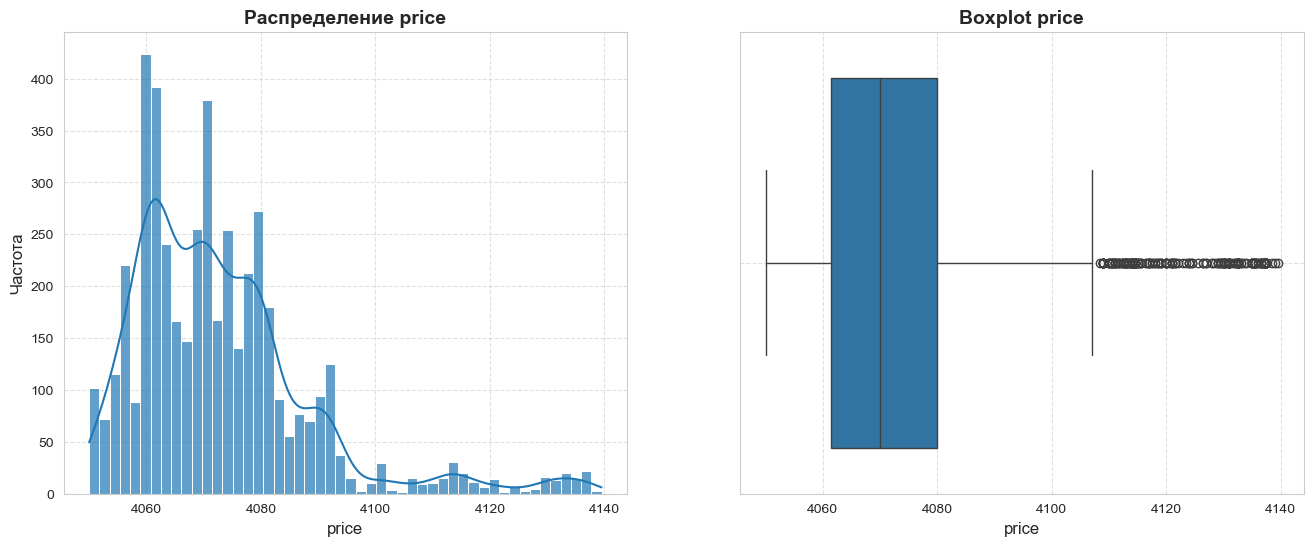

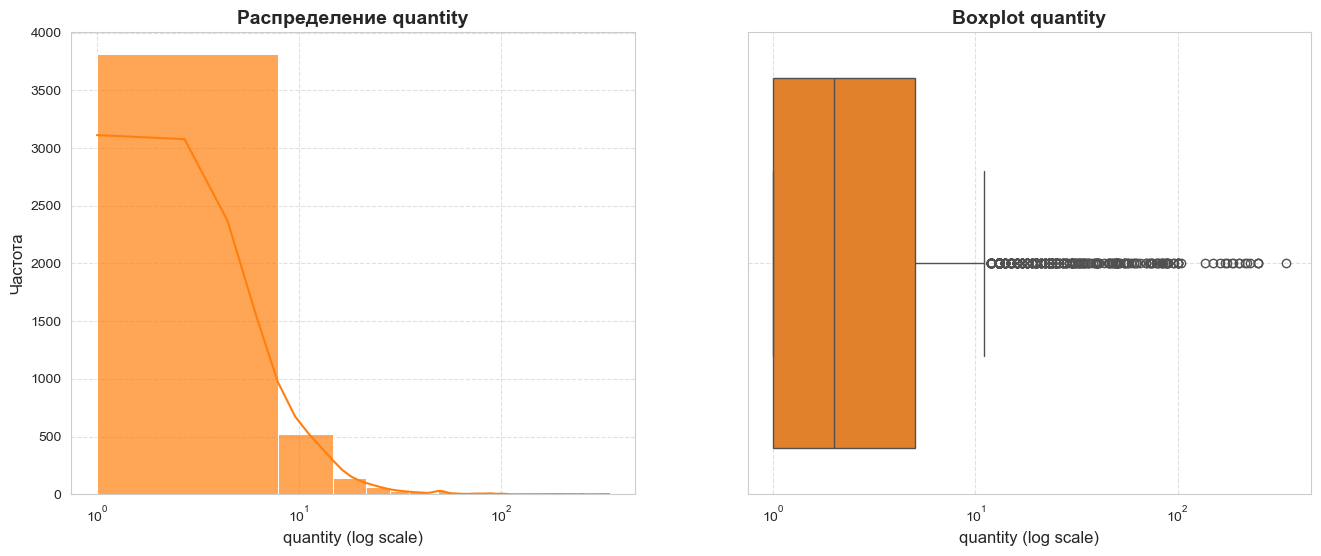

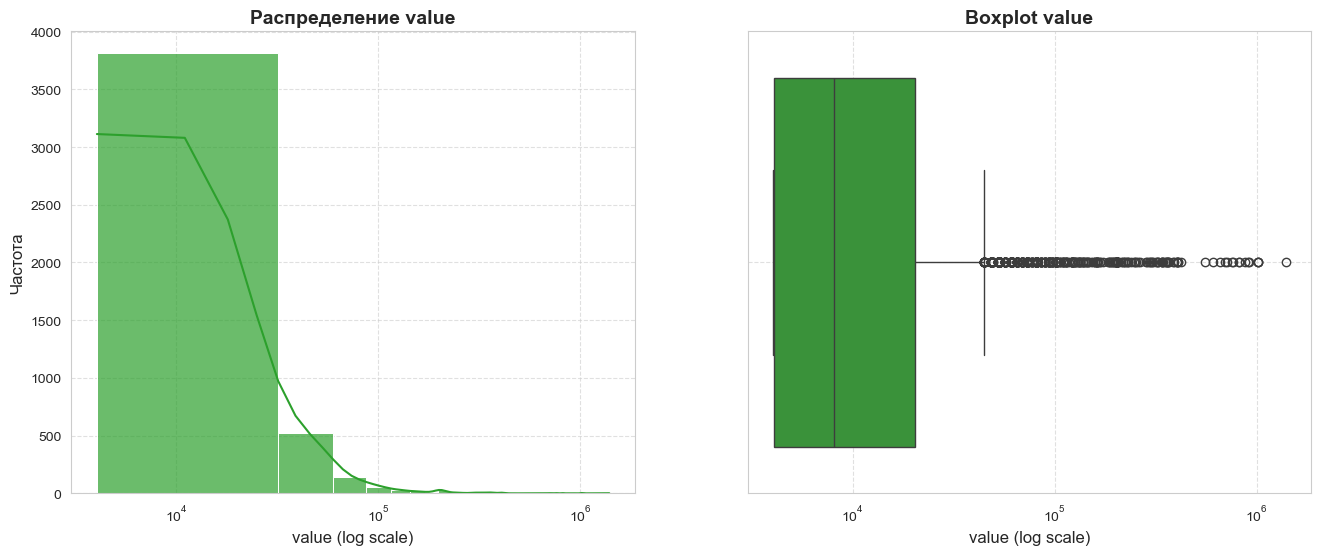

In [8]:
# Улучшенный анализ распределений и Boxplot для числовых переменных (с логарифмической шкалой)

# Настройки стиля
sns.set_style("whitegrid")

# Цвета для графиков
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Переменные для анализа
numerical_columns = ['price', 'quantity', 'value']

for i, col in enumerate(numerical_columns):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Увеличенный размер графиков

    # Гистограмма с KDE
    sns.histplot(df[col], kde=True, bins=50, color=colors[i], alpha=0.7, ax=axes[0])
    axes[0].set_title(f'Распределение {col}', fontsize=14, fontweight="bold")
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel("Частота", fontsize=12)
    axes[0].grid(True, linestyle="--", alpha=0.6)

    # Улучшенный Boxplot с логарифмической шкалой
    sns.boxplot(x=df[col], color=colors[i], ax=axes[1])
    axes[1].set_xlabel(col, fontsize=12)
    axes[1].set_title(f'Boxplot {col}', fontsize=14, fontweight="bold")
    axes[1].grid(True, linestyle="--", alpha=0.6)

    # Применение логарифмической шкалы для quantity и value
    if col in ["quantity", "value"]:
        axes[0].set_xscale("log")  # Логарифмическая шкала на гистограмме
        axes[1].set_xscale("log")  # Логарифмическая шкала на boxplot
        axes[0].set_xlabel(f"{col} (log scale)", fontsize=12)
        axes[1].set_xlabel(f"{col} (log scale)", fontsize=12)

    plt.show()


### **Выводы по анализу распределений числовых переменных**

**1. Гистограммы**
- Визуализация плотности распределения каждой переменной.
- `price` имеет **узкий диапазон колебаний** и близок к нормальному распределению.
- `quantity` и `value` **имеют сильную правостороннюю асимметрию**, что указывает на редкие крупные сделки.

**2. Boxplot (ящик с усами)**
- Выявление выбросов.
- `price` **стабилен**, но `quantity` и `value` содержат **аномально большие сделки**, что подтверждает выбросы.

**3. Логарифмическая шкала**
- Применена для `quantity` и `value`, так как их распределения **имеют длинный хвост**.
- Позволяет лучше рассмотреть структуру данных и выбросы.

**Итог**
- `price` относительно стабилен.
- `quantity` и `value` содержат **крупные выбросы**, указывающие на редкие, но значительные по объему сделки.
- Логарифмирование помогает **лучше интерпретировать распределение данных**.


## Корреляционный анализ числовых переменных

Для  датасета с переменными price, quantity и value, лучший метод корреляции — Spearman. Это связано с тем, что данные могут содержать выбросы и асимметричное распределение, что делает метод Pearson менее подходящим. Spearman не требует нормальности данных и хорошо работает с монотонными зависимостями, что важно для анализа таких данных.

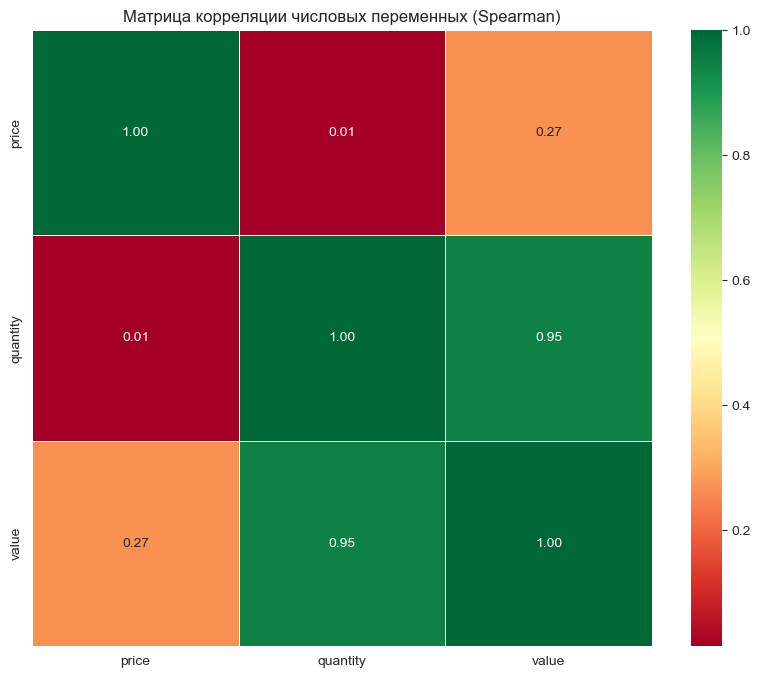

In [12]:
# Корреляционный анализ
numerical_columns = ['price', 'quantity', 'value']
df_numeric = df[numerical_columns]

# Корреляция методом Spearman
corr_matrix_spearman = df_numeric.corr(method='spearman')

# Визуализация Spearman корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_spearman, annot=True, fmt=".2f", cmap="RdYlGn", linewidths=0.5)
plt.title("Матрица корреляции числовых переменных (Spearman)")
plt.show()

## Анализ рассеяния числовых переменных

Диаграммы рассеяния используются для анализа зависимостей между переменными price, quantity и value. Они показывают, как эти переменные взаимодействуют друг с другом, и помогают визуализировать возможные линейные или нелинейные зависимости.

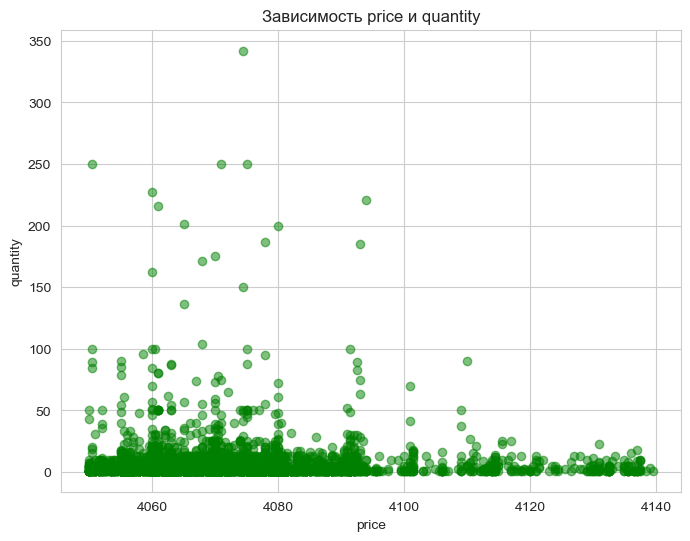

Коэффициент корреляции между price и quantity = -0.01


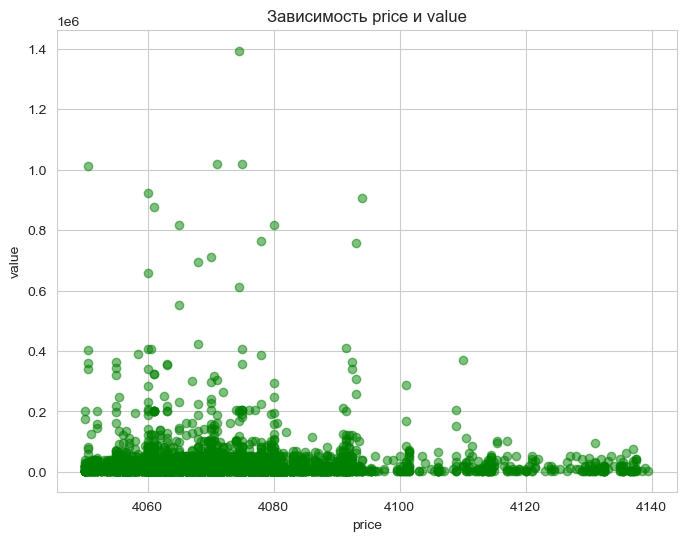

Коэффициент корреляции между price и value = -0.01


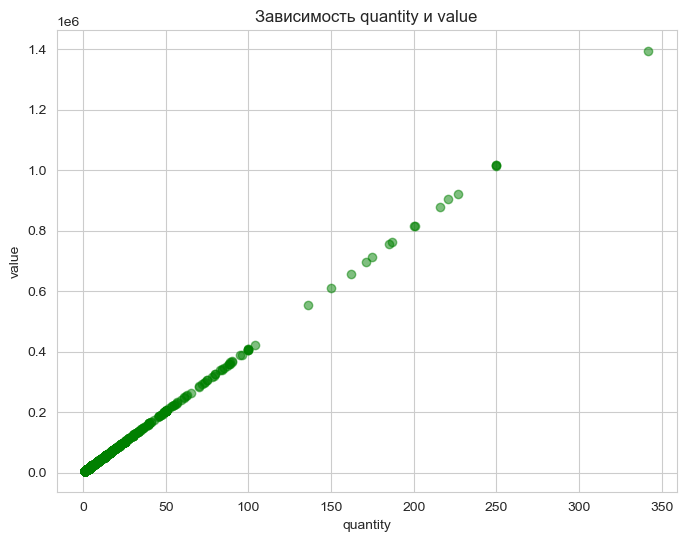

Коэффициент корреляции между quantity и value = 1.0


In [15]:
# Перебираем все уникальные пары переменных для построения диаграмм рассеяния
numerical_columns = ['price', 'quantity', 'value']

# Создаем субплоты для каждой уникальной пары переменных
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Построим диаграмму рассеяния для каждой уникальной пары переменных
        ax.scatter(x=df[numerical_columns[i]], y=df[numerical_columns[j]], alpha=0.5, color='green')
        
        ax.set_title(f'Зависимость {numerical_columns[i]} и {numerical_columns[j]}')
        ax.set_xlabel(numerical_columns[i])
        ax.set_ylabel(numerical_columns[j])
        
        plt.show()
        
        # Выводим коэффициенты корреляции между переменными
        print(f'Коэффициент корреляции между {numerical_columns[i]} и {numerical_columns[j]} =',
              df[numerical_columns[i]].corr(df[numerical_columns[j]]).round(2))


### Выводы по диаграммам рассеяния с учетом коэффициентов корреляции

1. **Зависимость `price` и `quantity`**:
   - Коэффициент корреляции: **-0.01**.
   - **Вывод**: Практически отсутствует линейная зависимость между ценой и количеством акций. Наблюдается очень слабая отрицательная корреляция, что подтверждается отсутствием явных трендов на диаграмме.

2. **Зависимость `price` и `value`**:
   - Коэффициент корреляции: **-0.01**.
   - **Вывод**: Существует крайне слабая отрицательная корреляция между ценой и объемом сделки. Нет явной линейной зависимости, что подтверждается диаграммой и низким коэффициентом корреляции.

3. **Зависимость `quantity` и `value`**:
   - Коэффициент корреляции: **1.0**.
   - **Вывод**: Между количеством акций и объемом сделки существует **первая степень зависимости** (полная положительная корреляция). Это подтверждается тем, что увеличение количества акций всегда ведет к увеличению объема сделки.


## Рассчет общего количества акций и общей стоимости сделок

In [18]:
# Рассчет общего количества акций и общей стоимости сделок
total_quantity = df['quantity'].sum()
total_value = df['value'].sum()

# Вывод данных в таблице
summary_df = pd.DataFrame({
    "Метрика": ["Общее количество акций", "Общая стоимость сделок"],
    "Значение": [total_quantity, total_value]
})

summary_df

,Метрика,Значение
0,Общее количество акций,27335.0
1,Общая стоимость сделок,111315679.0


## Анализ сезонности средней цены и объема торгов

Сезонность в торговых данных помогает выявить закономерности изменения цены и объема сделок в течение дня, что важно для оптимизации стратегий и определения лучших моментов для торговли.

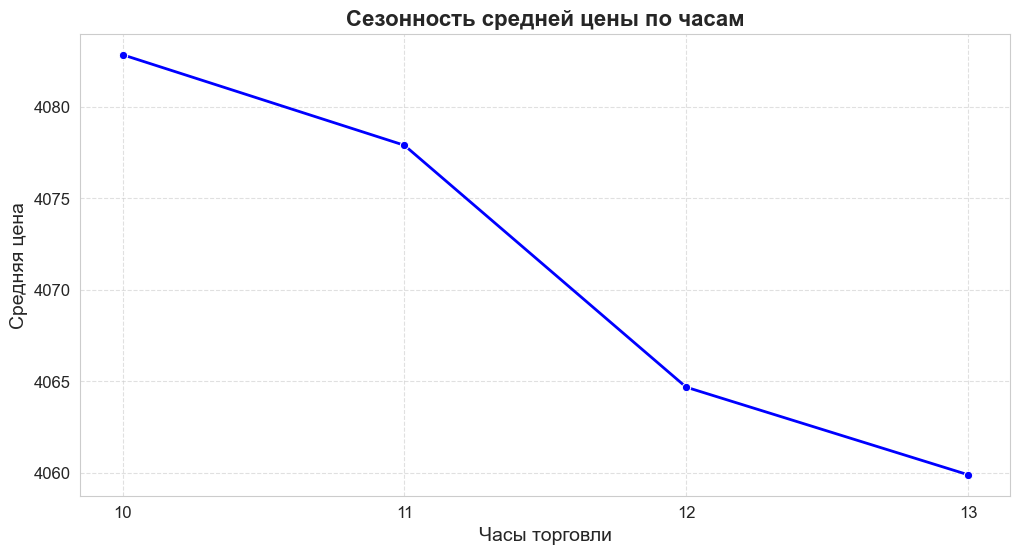

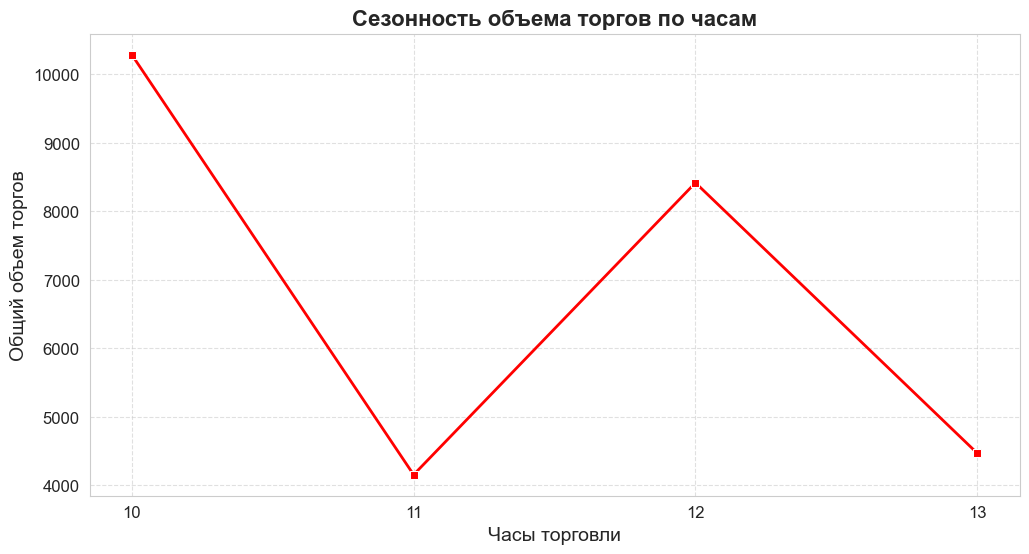

In [21]:
# Выбор переменных для анализа сезонности
df['hour'] = pd.to_datetime(df['systime']).dt.hour

# Группировка данных по часам и расчет среднего значения цены и объема торгов
hourly_stats = df.groupby('hour').agg({'price': 'mean', 'quantity': 'sum'}).reset_index()

# Настройки стиля
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Визуализация сезонности цены с улучшенным оформлением
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_stats['hour'], y=hourly_stats['price'], marker='o', linestyle='-', color='blue', linewidth=2)
plt.xlabel("Часы торговли", fontsize=14)
plt.ylabel("Средняя цена", fontsize=14)
plt.title("Сезонность средней цены по часам", fontsize=16, fontweight='bold')
plt.xticks(hourly_stats['hour'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Визуализация сезонности объема торгов с улучшенным оформлением
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_stats['hour'], y=hourly_stats['quantity'], marker='s', linestyle='-', color='red', linewidth=2)
plt.xlabel("Часы торговли", fontsize=14)
plt.ylabel("Общий объем торгов", fontsize=14)
plt.title("Сезонность объема торгов по часам", fontsize=16, fontweight='bold')
plt.xticks(hourly_stats['hour'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### **Выводы:**

#### **Средняя цена по часам**
- Цена изменяется в течение дня, что может быть связано с сессиями, новостями и активностью крупных игроков.
- Определенные часы могут быть более волатильными.

#### **Объем торгов по часам**
- Объем сделок колеблется, отражая активность трейдеров.
- Высокие объемы означают повышенную ликвидность, а низкие — возможную волатильность.


## Анализ кумулятивных данных 
Анализ кумулятивных данных полезен для отслеживания трендов в динамике цены и выручки. Он помогает понять, как формируются изменения в течение дня и выявить аномалии или всплески активности.

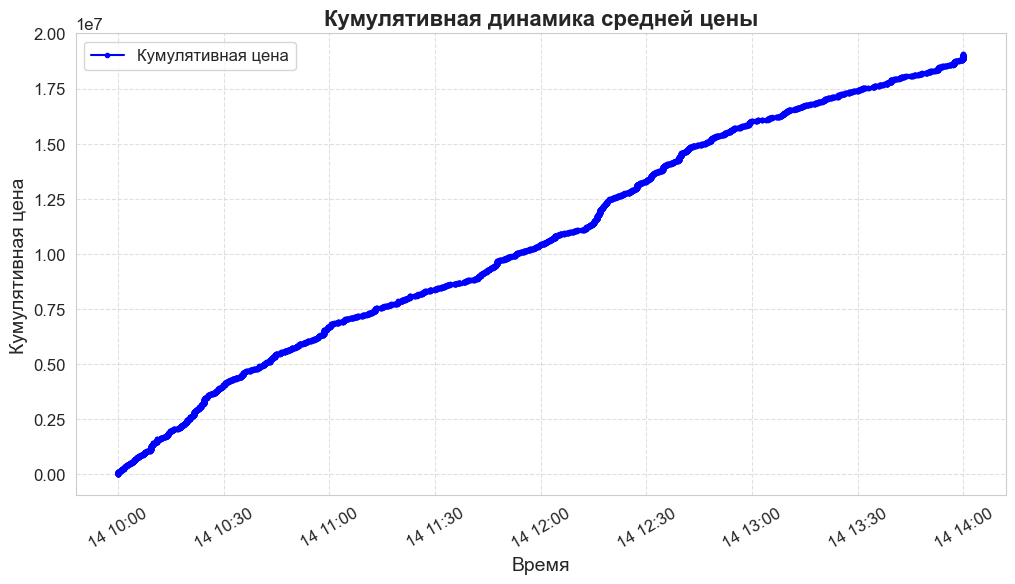

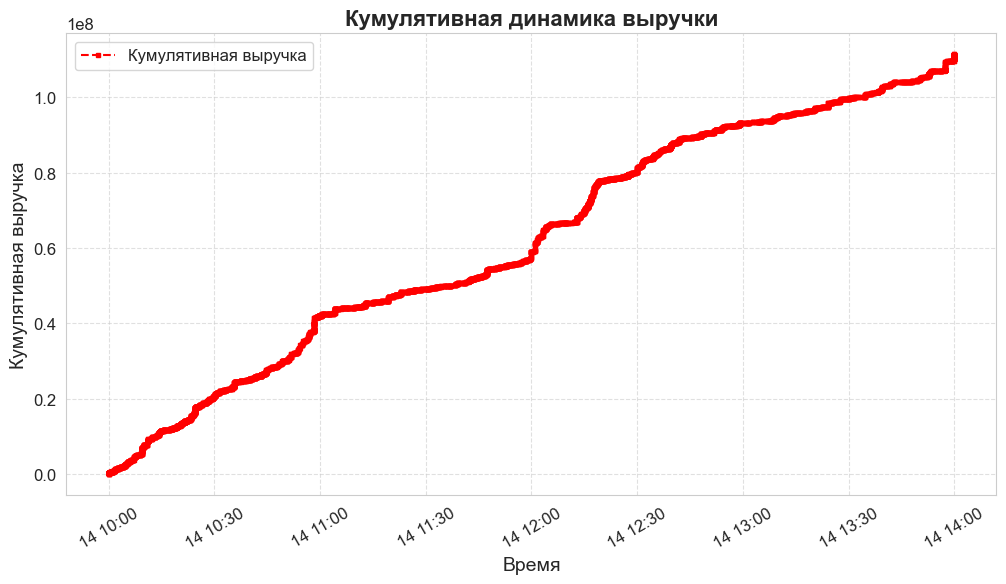

In [24]:
# Добавление кумулятивных метрик
df['cumulative_price'] = df['price'].cumsum()
df['cumulative_value'] = df['value'].cumsum()

# Визуализация кумулятивной средней цены
plt.figure(figsize=(12, 6))
plt.plot(df['systime'], df['cumulative_price'], label='Кумулятивная цена', color='blue', linestyle='-', marker='o', markersize=3)
plt.xlabel("Время", fontsize=14)
plt.ylabel("Кумулятивная цена", fontsize=14)
plt.title("Кумулятивная динамика средней цены", fontsize=16, fontweight='bold')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Визуализация кумулятивной выручки
plt.figure(figsize=(12, 6))
plt.plot(df['systime'], df['cumulative_value'], label='Кумулятивная выручка', color='red', linestyle='--', marker='s', markersize=3)
plt.xlabel("Время", fontsize=14)
plt.ylabel("Кумулятивная выручка", fontsize=14)
plt.title("Кумулятивная динамика выручки", fontsize=16, fontweight='bold')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### **Выводы:**

**Кумулятивная цена**
- Постепенный рост указывает на стабильность рынка.
- Резкие изменения могут сигнализировать о всплеске активности трейдеров или влиянии новостей.

**Кумулятивная выручка**
- Позволяет увидеть общую динамику торговой активности.
- Рост показывает, насколько интенсивно происходит торговля в течение дня.


## Доля покупок и продаж на протяжении времени. Кумулятивное соотношение покупок и продаж.

Кумулятивные покупки и продажи показывают, кто доминирует на рынке (покупатели или продавцы). Если покупки растут быстрее – рынок укрепляется, если продажи – ослабляется.
Соотношение покупок к продажам (B/S) отражает баланс спроса и предложения. Значение выше 1 означает перевес покупателей, ниже 1 – доминирование продавцов.

In [27]:
# Рассчет доли покупок (B) и продаж (S) на протяжении времени
df['buy_sell_numeric'] = df['buysell'].apply(lambda x: 1 if x == 'B' else -1)

# Кумулятивное соотношение покупок и продаж
df['cumulative_buy_sell'] = df['buy_sell_numeric'].cumsum()

# Группировка по времени (минутные интервалы) и расчет суммы покупок и продаж
df['minute'] = df['systime'].dt.floor('T')
buy_sell_trend = df.groupby(['minute', 'buysell'])['quantity'].sum().unstack().fillna(0)

# Вычисление кумулятивных значений покупок и продаж
buy_sell_trend['cumulative_buy'] = buy_sell_trend['B'].cumsum()
buy_sell_trend['cumulative_sell'] = buy_sell_trend['S'].cumsum()

# Расчет соотношения покупок к продажам
buy_sell_trend['buy_sell_ratio'] = buy_sell_trend['cumulative_buy'] / (buy_sell_trend['cumulative_sell'] + 1)

# Вывод таблицы
buy_sell_trend.reset_index(inplace=True)
buy_sell_trend.head()


buysell,minute,B,S,cumulative_buy,cumulative_sell,buy_sell_ratio
0,2025-02-14 10:00:00,68.0,104.0,68.0,104.0,0.647619
1,2025-02-14 10:01:00,49.0,106.0,117.0,210.0,0.554502
2,2025-02-14 10:02:00,45.0,49.0,162.0,259.0,0.623077
3,2025-02-14 10:03:00,46.0,31.0,208.0,290.0,0.714777
4,2025-02-14 10:04:00,51.0,132.0,259.0,422.0,0.612293


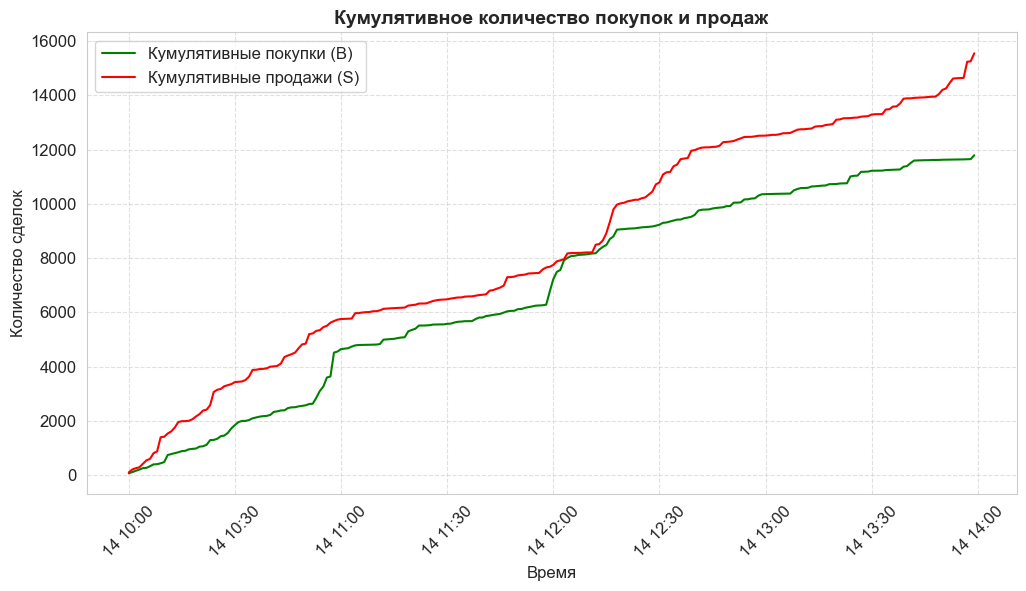

buysell,index,minute,B,S,cumulative_buy,cumulative_sell,buy_sell_ratio
0,0,2025-02-14 10:00:00,68.0,104.0,68.0,104.0,0.647619
1,1,2025-02-14 10:01:00,49.0,106.0,117.0,210.0,0.554502
2,2,2025-02-14 10:02:00,45.0,49.0,162.0,259.0,0.623077
3,3,2025-02-14 10:03:00,46.0,31.0,208.0,290.0,0.714777
4,4,2025-02-14 10:04:00,51.0,132.0,259.0,422.0,0.612293


In [28]:
# Визуализация кумулятивного соотношения покупок и продаж
plt.figure(figsize=(12, 6))
plt.plot(buy_sell_trend['minute'], buy_sell_trend['cumulative_buy'], label='Кумулятивные покупки (B)', color='green')
plt.plot(buy_sell_trend['minute'], buy_sell_trend['cumulative_sell'], label='Кумулятивные продажи (S)', color='red')
plt.xlabel("Время", fontsize=12)
plt.ylabel("Количество сделок", fontsize=12)
plt.title("Кумулятивное количество покупок и продаж", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

buy_sell_trend.reset_index(inplace=True)
buy_sell_trend.head()

### Выводы по анализу покупок и продаж

На графике показано изменение накопленного количества покупок (B) и продаж (S) по времени. На протяжении дня рынок находился под давлением продавцов, но около 12:00 покупатели временно активизировались. Однако в конце торговой сессии продажи снова начали доминировать. Это может свидетельствовать о фиксации прибыли или ослаблении покупательской активности.


## Анализ динамики среднего размера сделки. 
Данная метрика позволяет понять, как меняется ликвидность в течение торговой сессии, выявить периоды высокой активности и предсказать возможные изменения рыночных условий.

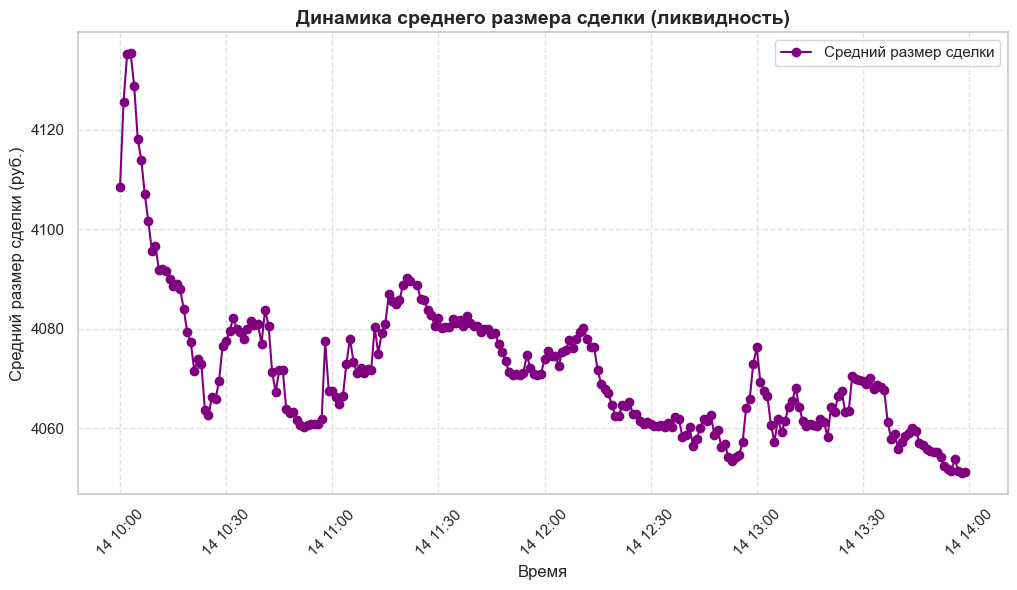

,minute,avg_trade_size
0,2025-02-14 10:00:00,4108.459184
1,2025-02-14 10:01:00,4125.631579
2,2025-02-14 10:02:00,4135.136364
3,2025-02-14 10:03:00,4135.375000
4,2025-02-14 10:04:00,4128.820513


In [74]:
# Рассчет среднего размера сделки (ликвидность)
df['avg_trade_size'] = df['value'] / df['quantity']

# Группировка по минутам и расчет среднего размера сделки в интервале
df['minute'] = df['systime'].dt.floor('T')
liquidity_trend = df.groupby('minute')['avg_trade_size'].mean().reset_index()

# Визуализация изменения среднего размера сделки по времени
plt.figure(figsize=(12, 6))
plt.plot(liquidity_trend['minute'], liquidity_trend['avg_trade_size'], label='Средний размер сделки', color='purple', marker='o')
plt.xlabel("Время", fontsize=12)
plt.ylabel("Средний размер сделки (руб.)", fontsize=12)
plt.title("Динамика среднего размера сделки (ликвидность)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Вывод первых строк таблицы
liquidity_trend.head()


## Выводы по анализу среднего размера сделки (ликвидность)

- Средний размер сделки показывает ликвидность рынка в разные периоды дня.  
- Рост среднего размера сделки может свидетельствовать о притоке крупных инвесторов.  
- Снижение размера сделки может указывать на уменьшение ликвидности и преобладание мелких ордеров.  
- График демонстрирует изменения ликвидности на протяжении торгового дня.  
- Начало торгов характеризуется высокой волатильностью ликвидности.  
- После 10:30 средний размер сделки стабилизируется, указывая на сбалансированный рынок.  
- После 13:30 наблюдается снижение ликвидности, что может указывать на снижение активности крупных игроков.  


## Анализ динамики средней цены акции

Анализ динамики средней цены акций позволяет выявить ключевые временные периоды, когда рыночная активность усиливается или ослабевает. Данный график отражает изменения средней цены акций по минутам, а также медианную цену, которая служит стабильным ориентиром, не подверженным влиянию выбросов.


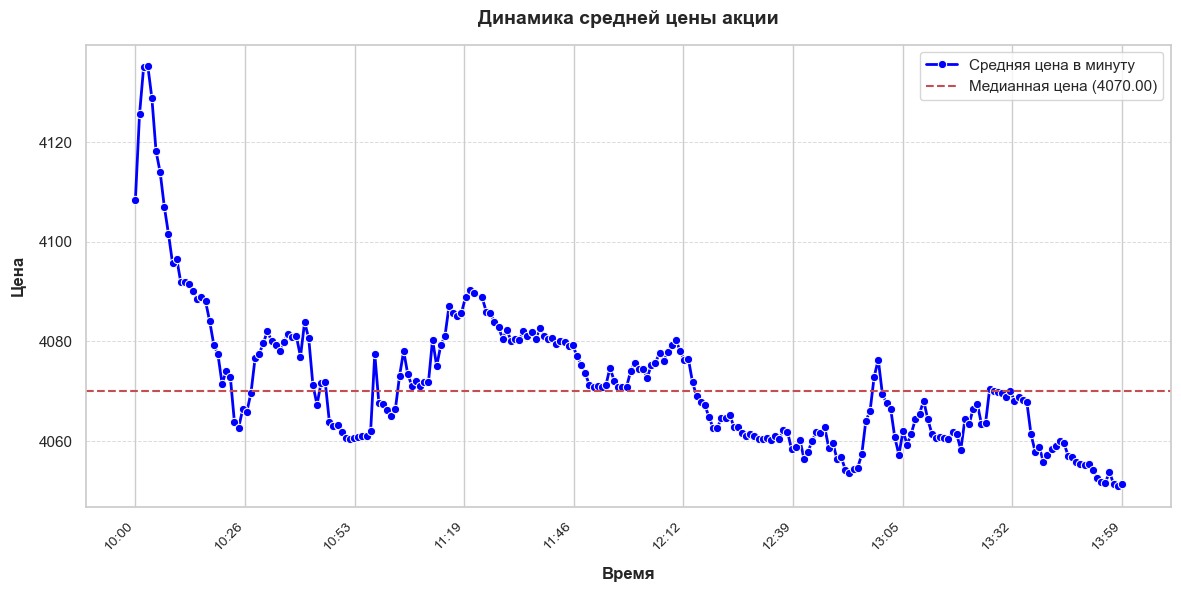

In [87]:
# Вычисление медианной цены (устойчива к выбросам)
median_price = df['price'].median()

# Группировка данных по минутам и расчет средней цены
df['trading_time'] = df['systime'].dt.floor('T')  # Округляем до минут
price_trend = df.groupby('trading_time')['price'].mean().reset_index()

# Преобразование datetime в числовой формат (timestamp) для корректной работы с осью X
price_trend['timestamp'] = price_trend['trading_time'].astype(np.int64) // 10**9  # Перевод в секунды

# Настройки стиля графика
sns.set_theme(style="whitegrid")

# Визуализация тренда средней цены
plt.figure(figsize=(14, 6))

# Линейный график средней цены
sns.lineplot(x=price_trend['timestamp'], y=price_trend['price'], 
             color='blue', linewidth=2, marker="o", markersize=6, label="Средняя цена в минуту")

# Горизонтальная линия медианной цены
plt.axhline(y=median_price, color='r', linestyle='--', linewidth=1.5, label=f'Медианная цена ({median_price:.2f})')

# Настройка оси X: преобразуем timestamps обратно в метки времени
tick_positions = np.linspace(price_trend['timestamp'].min(), price_trend['timestamp'].max(), num=10, dtype=int)
tick_labels = pd.to_datetime(tick_positions, unit='s').strftime('%H:%M')
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right', fontsize=10)

# Оформление графика
plt.xlabel("Время", fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel("Цена", fontsize=12, fontweight='bold', labelpad=10)
plt.title("Динамика средней цены акции", fontsize=14, fontweight='bold', pad=15)

# Оформление сетки и легенды
plt.legend(fontsize=11, loc="upper right")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Показываем график
plt.show()


## Выводы  

1. **Колебания в начале сессии**  
   - Резкий скачок цены вверх, затем быстрое снижение.  
   - Связано с высокой активностью и расстановкой ордеров крупными игроками.  

2. **Стабилизация после 10:30**  
   - Цена колеблется вокруг **4070 руб.**, указывая на рыночное равновесие.  

3. **Повышенная волатильность (11:00 – 13:00)**  
   - Торги идут равномерно без явного доминирования покупателей или продавцов.  

4. **Снижение после 13:30**  
   - Постепенное падение цены, вероятно из-за выхода крупных игроков и фиксации прибыли.  
   - Преобладание продаж под конец торгов.  

## Анализ отклонения цены от медианного значения

Этот график дополняет анализ динамики средней цены, показывая, насколько текущая цена отклоняется от медианного уровня **4070 руб.**. Он помогает выявить периоды, когда цена существенно отклоняется вверх или вниз, что может сигнализировать о рыночных аномалиях, высокой волатильности или смене тренда.


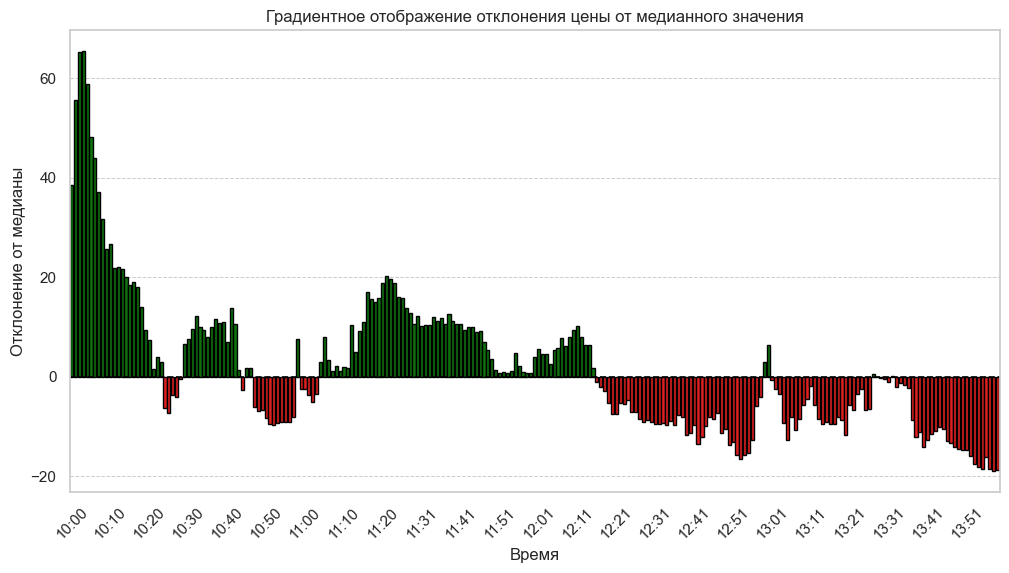

In [90]:
# Расчет отклонения фактической цены от медианы
price_trend['deviation'] = price_trend['price'] - median_price

# Генерация меток для оси X
tick_positions = np.arange(0, len(price_trend), step=10)  # Каждые 10 значений
tick_labels = price_trend['trading_time'].dt.strftime('%H:%M').iloc[tick_positions]

# Визуализация отклонений
plt.figure(figsize=(12, 6))
colors = np.where(price_trend['deviation'] > 0, 'green', 'red')
sns.barplot(x=price_trend.index, y=price_trend['deviation'], palette=colors, edgecolor='black')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1.2)
plt.xlabel("Время")
plt.ylabel("Отклонение от медианы")
plt.title("Градиентное отображение отклонения цены от медианного значения")

# Применение меток на ось X
plt.xticks(tick_positions, tick_labels, rotation=45)

plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

## Вывод  

- В начале торгов цена значительно превышала медиану, что указывает на активность покупателей.  
- После 10:20 наблюдались колебания, свидетельствующие о борьбе между покупателями и продавцами.  
- После 12:30 цена стабильно снижалась ниже медианы, показывая доминирование продавцов.  
- Конец сессии сопровождался устойчивым снижением, что может указывать на фиксацию прибыли и снижение ликвидности.  


## Анализ сравнения покупок и продаж (Buy vs Sell)  

График показывает динамику спроса и предложения на рынке, анализируя количество покупок (`B`) и продаж (`S`) в 5-минутных интервалах. Такое представление позволяет:  
- Определить периоды доминирования покупателей или продавцов.  
- Выявить резкие скачки объема, которые могут сигнализировать о повышенной волатильности.  
- Проанализировать стабильные и нестабильные участки рынка. 

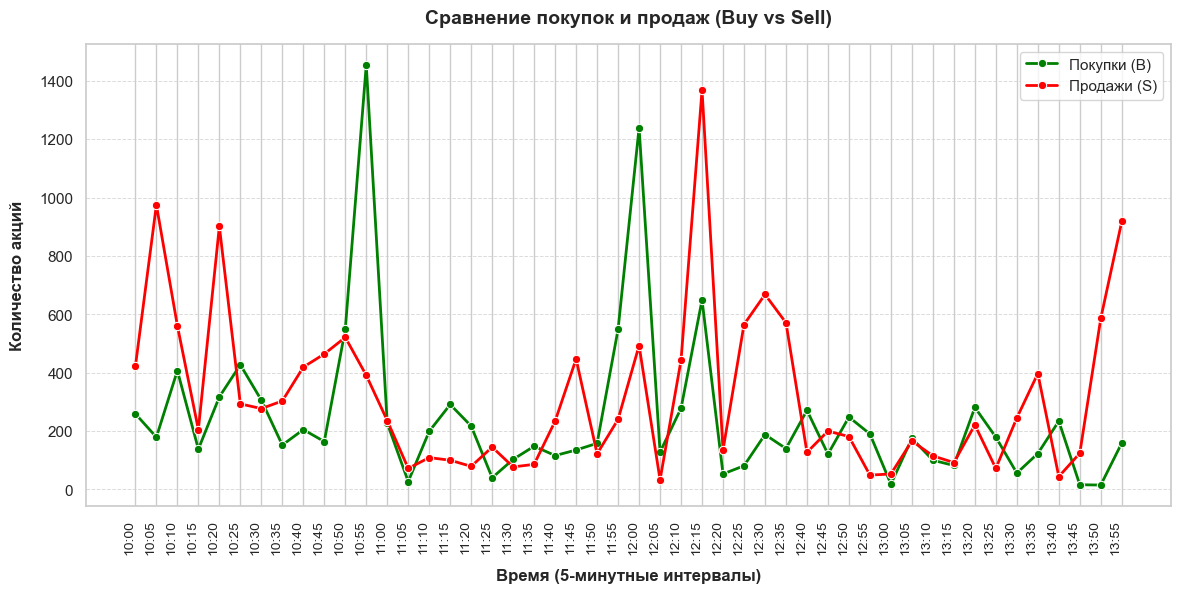

In [106]:
# Группировка по 5-минутным интервалам и направлению сделки
buy_sell_trend = df.groupby([df['systime'].dt.floor('5T'), 'buysell'])['quantity'].sum().unstack().fillna(0)

# Настройки стиля графика
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 6))

# Линии покупок и продаж с интервалом в 5 минут
sns.lineplot(x=buy_sell_trend.index, y=buy_sell_trend['B'], label='Покупки (B)', color='green', marker='o', linewidth=2)
sns.lineplot(x=buy_sell_trend.index, y=buy_sell_trend['S'], label='Продажи (S)', color='red', marker='o', linewidth=2)

# Настройка оси X: отображение каждого 5-минутного интервала
plt.xticks(buy_sell_trend.index[::1], buy_sell_trend.index.strftime('%H:%M')[::1], rotation=90, ha='right', fontsize=10)

# Оформление графика
plt.xlabel("Время (5-минутные интервалы)", fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel("Количество акций", fontsize=12, fontweight='bold', labelpad=10)
plt.title("Сравнение покупок и продаж (Buy vs Sell)", fontsize=14, fontweight='bold', pad=15)

# Легенда и сетка
plt.legend(fontsize=11, loc="upper right")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Показываем график
plt.show()


### Выводы по графику «Сравнение покупок и продаж (Buy vs Sell)»

### 1. Динамика покупок и продаж
- Покупки и продажи чередуются, указывая на смену настроений рынка.
- В отдельные периоды преобладают либо покупки, либо продажи.

### 2. Периоды высокой активности
- Всплески объема могут быть связаны с новостями или крупными сделками.
- Резкие скачки — индикатор волатильности.

### 3. Стабильные и нестабильные периоды
- Спокойные участки указывают на сбалансированный рынок.
- Резкие изменения сигнализируют о дисбалансе спроса и предложения.

### 4. Чередование трендов
- Частые пересечения линий указывают на флэт (отсутствие явного тренда).
- Долгое доминирование одной линии над другой может сигнализировать о восходящем или нисходящем тренде.

## Разница между покупками и продажами с учетом скользящего среднего  

График показывает разницу между покупками (`B`) и продажами (`S`) в 5-минутных интервалах. Добавление **скользящего среднего (3 интервала)** помогает сгладить колебания и выявить устойчивые тренды. Такой анализ важен для:  
- Определения преобладания покупателей или продавцов в разные периоды.  
- Выявления волатильных участков, где происходят резкие изменения баланса.  
- Поиска устойчивых трендов, когда покупки или продажи стабильно доминируют.

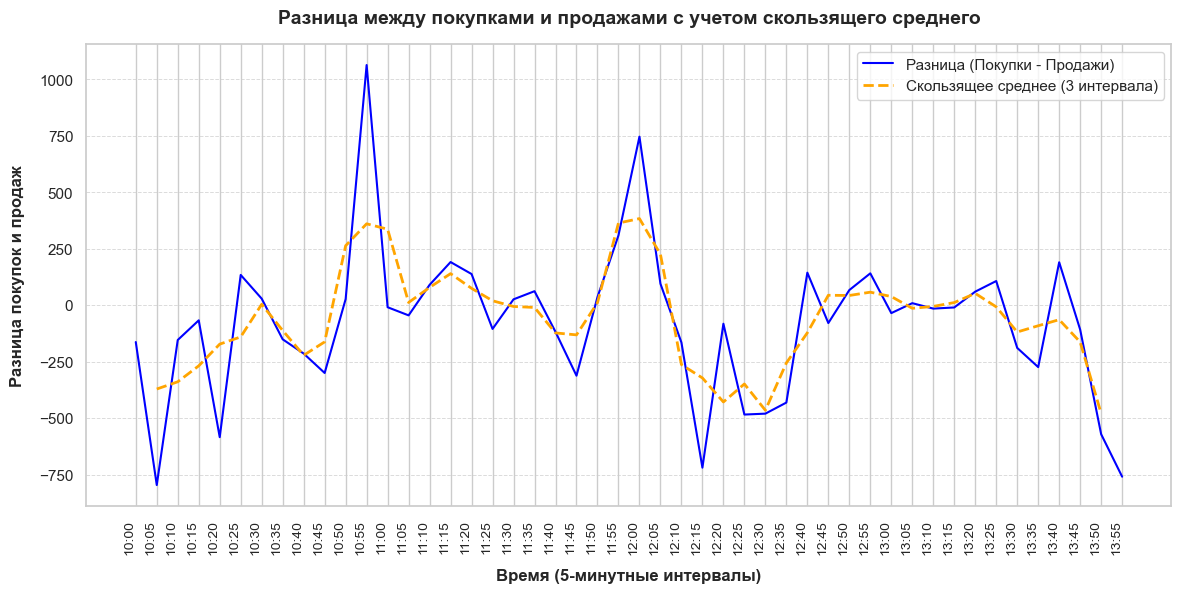

In [43]:
# Расчет разницы между покупками и продажами по 5-минутным интервалам
buy_sell_trend['difference'] = buy_sell_trend['B'] - buy_sell_trend['S']

# Применение скользящего среднего для сглаживания (окно 3 интервала)
buy_sell_trend['difference_smooth'] = buy_sell_trend['difference'].rolling(window=3, center=True).mean()

# Настройки стиля графика
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 6))

# Линия разницы между покупками и продажами
sns.lineplot(x=buy_sell_trend.index, y=buy_sell_trend['difference'], label='Разница (Покупки - Продажи)', color='blue', linewidth=1.5)
sns.lineplot(x=buy_sell_trend.index, y=buy_sell_trend['difference_smooth'], label='Скользящее среднее (3 интервала)', color='orange', linewidth=2, linestyle='--')

# Настройка оси X: временные метки каждые 5 минут
plt.xticks(buy_sell_trend.index[::1], buy_sell_trend.index.strftime('%H:%M')[::1], rotation=90, ha='right', fontsize=10)

# Оформление графика
plt.xlabel("Время (5-минутные интервалы)", fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel("Разница покупок и продаж", fontsize=12, fontweight='bold', labelpad=10)
plt.title("Разница между покупками и продажами с учетом скользящего среднего", fontsize=14, fontweight='bold', pad=15)

# Легенда и сетка
plt.legend(fontsize=11, loc="upper right")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Показываем график
plt.show()


### Выводы  

1. **Колебания в начале сессии** – резкие скачки разницы сигнализируют о нестабильности спроса и предложения.  
2. **Доминирование покупателей и продавцов** – разница периодически уходит в плюс или минус, отражая краткосрочные тренды.  
3. **Скользящее среднее сглаживает колебания** – показывает общий баланс между покупками и продажами.  
4. **Снижение разницы к концу сессии** – указывает на сбалансированный рынок или снижение активности.  


## Анализ объема торгов по 5-минутным интервалам  

### Введение  
Для оценки активности торгов используется группировка данных по 5-минутным интервалам, что позволяет выявить периоды высокой и низкой ликвидности. Такой формат представления данных аналогичен биржевым платформам, включая **Investing.com**, где объем торгов и цены активов часто анализируются в 5-минутных, 15-минутных и других временных интервалах.  

Этот метод позволяет:  
- **Отслеживать динамику спроса и предложения** в течение торгового дня.  
- **Определять ключевые периоды активности** крупных участников.  
- **Оценивать средний объем сделок**, выделяя аномальные всплески или затишья.  

### **Описание столбцов в данных по 5-минутным интервалам**

| Столбец         | Описание |
|-----------------|----------|
| **trading_time** | Временной интервал в формате `"YYYY-MM-DD HH:MM"`, указывающий на начало 5-минутного периода. Округляется вниз до ближайших 5 минут. |
| **trade_volume** | Общее количество акций, проданных в течение данного 5-минутного интервала (сумма `quantity`). |

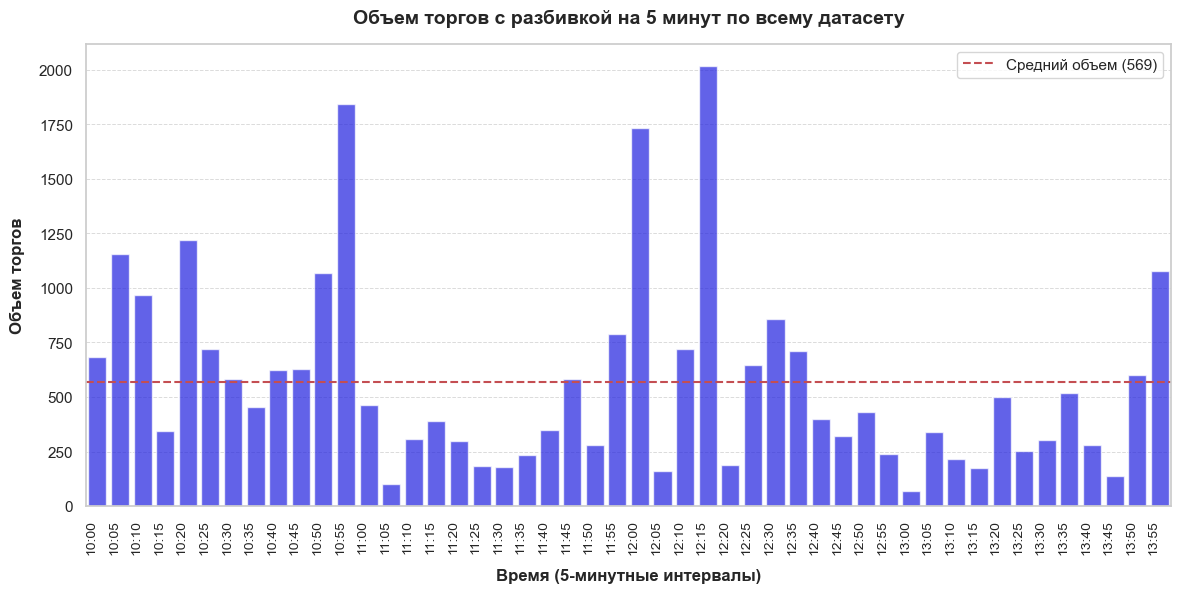

In [36]:
# Группировка данных по 5-минутным интервалам и расчет объема торгов
trade_volume_5min = df.groupby(df['systime'].dt.floor('5T'))['quantity'].sum().reset_index()

# Переименование столбцов
trade_volume_5min.rename(columns={'quantity': 'trade_volume', 'systime': 'trading_time'}, inplace=True)

# Настройки стиля графика
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 6))

# Построение столбчатого графика объема торгов по 5-минутным интервалам
sns.barplot(x=trade_volume_5min['trading_time'].dt.strftime('%H:%M'), 
            y=trade_volume_5min['trade_volume'], color='blue', alpha=0.7)

# Средний объем торгов
avg_trade_volume_5min = trade_volume_5min['trade_volume'].mean()
plt.axhline(y=avg_trade_volume_5min, color='r', linestyle='--', linewidth=1.5, label=f'Средний объем ({int(avg_trade_volume_5min)})')

# Установка меток на оси X для каждого 5-минутного интервала
plt.xticks(rotation=90, ha='right', fontsize=10)

# Оформление графика
plt.xlabel("Время (5-минутные интервалы)", fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel("Объем торгов", fontsize=12, fontweight='bold', labelpad=10)
plt.title("Объем торгов с разбивкой на 5 минут по всему датасету", fontsize=14, fontweight='bold', pad=15)

# Оформление сетки и легенды
plt.legend(fontsize=11, loc="upper right")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Показываем график
plt.show()


### Выводы  
1. **Высокая активность в начале сессии** – крупные объемы из-за входа крупных игроков.  
2. **Всплески ликвидности** – наблюдаются около **11:00 и 12:15**, что может указывать на исполнение крупных ордеров.  
3. **Спад объемов в середине дня** – между **11:30 и 12:00** рынок менее активен.  
4. **Рост объемов после 12:00** – возможная реакция на новости или новые сделки.  
5. **Средний объем – 569 сделок** – пики выше этого уровня указывают на повышенную активность.  

## Часть 3: Анализ динамики волатильности цены актива в течение дня

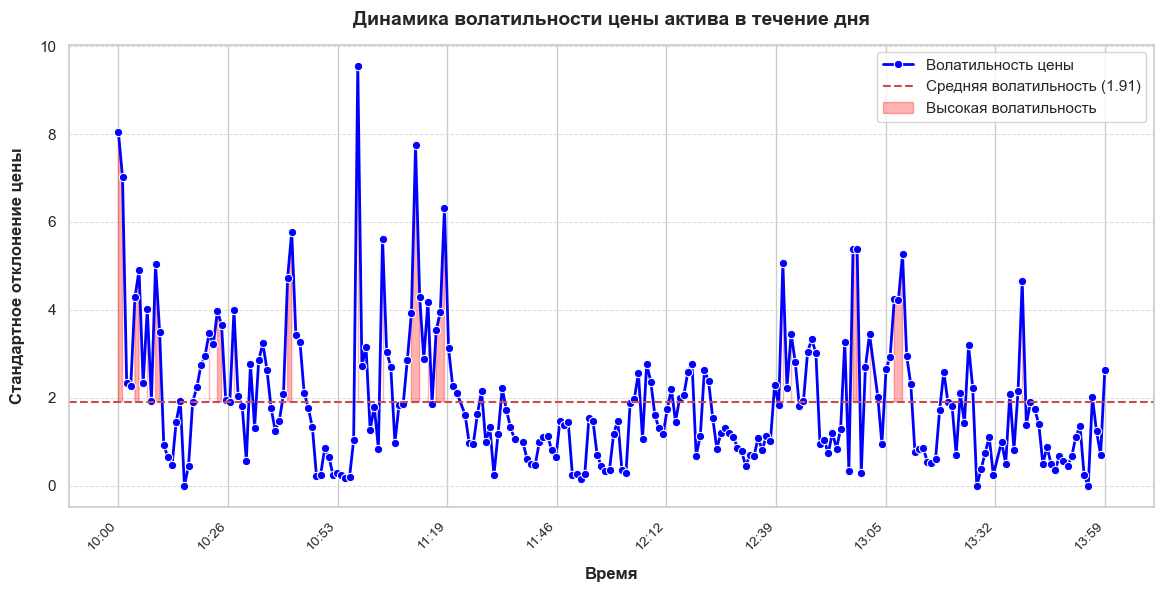

In [38]:
# Группировка по минутам и расчет волатильности (STD)
volatility_trend = df.groupby(df['systime'].dt.floor('T'))['price'].std().reset_index()

# Переименовываем столбец для удобства
volatility_trend.rename(columns={'price': 'volatility', 'systime': 'trading_time'}, inplace=True)

# Преобразуем datetime в числовой формат (timestamp) для корректной работы fill_between
volatility_trend['timestamp'] = volatility_trend['trading_time'].astype(np.int64) // 10**9  # Перевод в секунды

# Настройки стиля графика
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 6))

# Линейный график с маркерами
sns.lineplot(x=volatility_trend['timestamp'], y=volatility_trend['volatility'], 
             color='blue', linewidth=2, marker="o", markersize=6, label="Волатильность цены")

# Горизонтальная линия среднего уровня волатильности
avg_volatility = volatility_trend['volatility'].mean()
plt.axhline(y=avg_volatility, color='r', linestyle='--', linewidth=1.5, label=f'Средняя волатильность ({avg_volatility:.2f})')

# Выделение зон высокой волатильности (без использования where)
high_volatility_threshold = avg_volatility + volatility_trend['volatility'].std()
high_volatility_mask = volatility_trend['volatility'] > high_volatility_threshold
plt.fill_between(volatility_trend['timestamp'], volatility_trend['volatility'], avg_volatility, 
                 where=high_volatility_mask, color='red', alpha=0.3, label="Высокая волатильность")

# Настройка оси X: преобразуем timestamps обратно в метки времени
tick_positions = np.linspace(volatility_trend['timestamp'].min(), volatility_trend['timestamp'].max(), num=10, dtype=int)
tick_labels = pd.to_datetime(tick_positions, unit='s').strftime('%H:%M')
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right', fontsize=10)

# Оформление графика
plt.xlabel("Время", fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel("Стандартное отклонение цены", fontsize=12, fontweight='bold', labelpad=10)
plt.title("Динамика волатильности цены актива в течение дня", fontsize=14, fontweight='bold', pad=15)

# Оформление сетки и легенды
plt.legend(fontsize=11, loc="upper right")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Показываем график
plt.show()


## Анализ динамики волатильности цены актива в течение дня  

### Введение  
Волатильность – это мера изменчивости цены актива во времени. В данном анализе она рассчитывается как **стандартное отклонение (STD) цен в минутных интервалах**, что позволяет:  
- Определить периоды высокой и низкой рыночной активности.  
- Выявить моменты резких изменений цен.  
- Оценить общее состояние рынка (стабильный или волатильный).  

### Формула расчета волатильности  
Волатильность рассчитывается по формуле **стандартного отклонения**:  

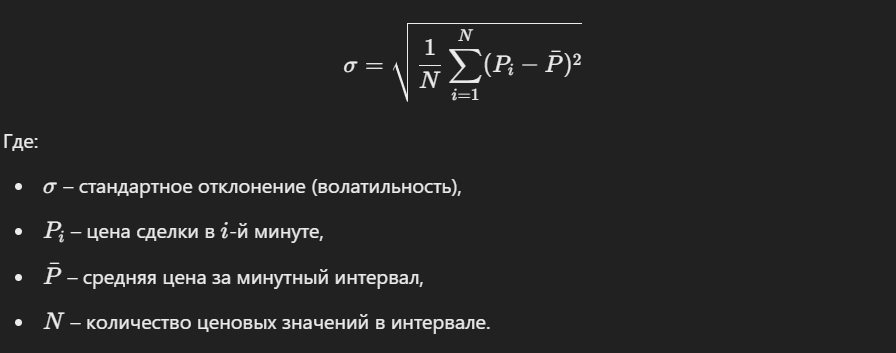

Этот метод позволяет отследить краткосрочные колебания и выделить периоды повышенной нестабильности.  

### Выводы  

1. **Высокая волатильность в начале сессии**  
   - В первые минуты наблюдаются значительные ценовые колебания, что связано с входом крупных игроков и первыми сделками.  

2. **Периоды нестабильности и спокойные участки**  
   - В середине дня волатильность снижается, но время от времени наблюдаются резкие всплески.  
   - Красные зоны на графике указывают на моменты, когда волатильность превышает средний уровень.  

3. **Рост волатильности во второй половине дня**  
   - После 13:00 волатильность увеличивается, что может быть связано с новыми торговыми событиями или закрытием позиций перед концом сессии.  

### Итог  
Анализ волатильности помогает выявлять нестабильные периоды, оценивать рыночные риски и прогнозировать возможные резкие движения цены. График показывает, что рынок наиболее активен в начале и конце торгов, а средняя волатильность составляет **1.91**.  
